In [1]:
import pandas as pd
import numpy as np
import os

folder_path = 'shell_script_results/f3_tests_1'

combined_data = pd.DataFrame()

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    # Check if the item is a file (not a subdirectory)
    if os.path.isfile(file_path) and filename.endswith('.txt'):
        # Read the text file into a DataFrame
        df = pd.read_csv(file_path, sep=' ', header=None)  # Corrected the header argument
        # Concatenate the current DataFrame with the combined_data
        combined_data = pd.concat([combined_data, df],axis=1,ignore_index=True)
# Now, combined_data contains the data from all text files in the 'target' folder within 'results'
combined_data.shape
dataset = combined_data.to_numpy()

dataset = np.reshape(dataset, (3,-1,18))
dataset.shape


(3, 14, 18)

In [2]:
successful_counts = np.zeros(dataset.shape[-1])
for data in dataset[2]:
    for i in range(len(data)):
        if data[i] == 1:
            successful_counts[i] += 1
successful_counts


array([ 5.,  8.,  9., 10., 11., 10., 10.,  9.,  9.,  8., 10.,  9., 10.,
       10., 11.,  9.,  9.,  7.])

In [16]:
average_times = np.zeros(dataset.shape[-1])
for data in dataset[0]:
    for i in range(len(data)):
        if str(data[i]) != 'nan':
            average_times[i] += (data[i]/dataset.shape[1])
        else:
            average_times[i] += (2000/dataset.shape[1])
average_times

array([  10.78571429,  483.21428571,  691.        ,  908.14285714,
       1015.28571429, 1108.42857143, 1177.92857143, 1264.07142857,
       1341.71428571, 1421.28571429, 1478.5       , 1536.64285714,
       1613.28571429, 1675.92857143, 1728.92857143, 1791.        ,
       1857.57142857, 1910.64285714])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


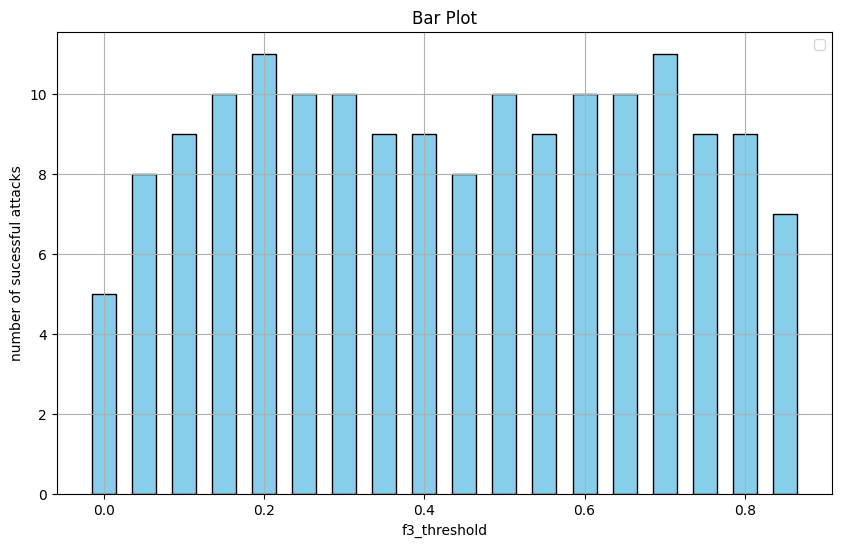

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.grid(True)
bar_width = 0.03  # Adjust the width of the bars
plt.bar(np.arange(0, 0.9, 0.05), successful_counts, width=bar_width, color='skyblue', edgecolor='black')

plt.title('Bar Plot')
plt.xlabel('f3_threshold')
plt.ylabel('number of sucessful attacks')
plt.legend()
plt.savefig("01_f3_threshold_varying_success.png")

Text(0, 0.5, 'average time of attacks')

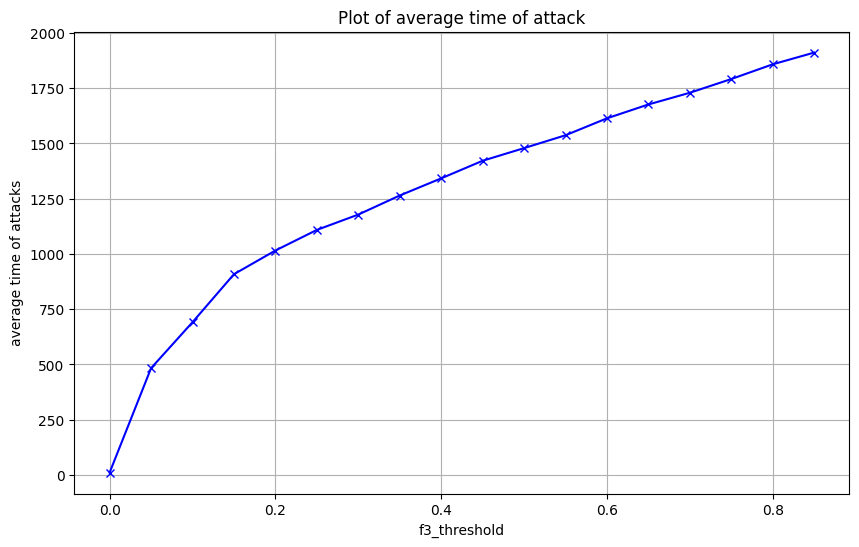

In [24]:
plt.figure(figsize=(10, 6))

plt.grid(True)
bar_width = 0.03  # Adjust the width of the bars
plt.plot(np.arange(0, 0.9, 0.05), average_times, color='blue',marker='x')

plt.title('Plot of average time of attack')
plt.xlabel('f3_threshold')
plt.ylabel('average time of attacks')